# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Exercícios - com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [2]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercício 1)

Quando comparamos imagens e sinais e suas características, o que devemos considerar a priori?

(a) Sinais possuem valores independente e identicamente distribuídos, enquanto Imagens possuem pixels organizados de forma espacial<br>
(b) Sinais possuem valores codificados em 16 bits, enquanto imagens possuem valores codificados em 8 bits<br>
(c) Sinais possuem valores com dependência sequencial, enquanto imagens não possuem padrão de dependência<br>
<font color='red'>(d) Sinais possuem valores com dependência sequencial, enquanto Imagens possuem dependência espacial de seus valores<br></font>

<font color='red'>Resposta</font>: *a priori, sempre devemos considerar que sinais e imagens possuem valores com dependência respectivamente sequencial e espacial. Ainda que sinais e imagens podem ser observados com dados i.i.d., quando isso acontece perdemos a coerencia espacial (no caso de imagens) e sequencial (no caso de sinais) que os caraterizam.*


### Exercício 2)

Sejam sinais representados por 32 bits (int32) e imagens representadas por 16 bits sem sinal (uint16). Quantos valores distintos é possível representar em cada um desses dados?

(a) Sinais: 4,29 Bilhões; Imagens 32,76 Mil<br>
<font color='red'>(b) Sinais: 4,29 Bilhões; Imagens 65,53 Mil<br></font>
(c) Sinais: 2,14 Bilhões; Imagens 32,76 Mil<br>
(d) Sinais: 2,14 Bilhões; Imagens 65,53 Mil<br>

<font color='red'>Resposta</font>: $2^{32}=4,29$ bilhões, $2^{16}=65,53$ mil, independente da representação permitir ou não sinais o número de valores distintos é obtido da mesma maneira. 

### Exercício 3)

Carregue os dados do arquivo `sinais2.csv` utilizando 

`signals = np.genfromtxt(arquivo, delimiter=',').astype(np.float32)`.

O array resultante possui um sinal por linha, i.e. `sinal[i]`

Utilizando os sinais carregados utilize a `np.fft.fft()` para obter a Transformada de Fourier dos sinais. Depois, considerando apenas frequências até 50 Hz, calcule quais são as 4 frequências de maior valor de magnitude (maginute calculada pelo `np.abs()`). Aqui não queremos os valores da magnitude, mas a quais frequências (índices) elas se referem. Para complementar a análise, plote as magnitudes das transformadas até a frequência 50.

Analisando as frequências de maior magnitude temos as frequências que mais caracterizam o sinal. Considerando as 4 frequências computadas anteriormente, podemos dividir os sinais em categorias distintas. Nesse sentido, qual análise abaixo está correta?

(a) O sinal 4 possui frequências inferiores quando comparado com os demais, indicando que o sinal 4 é provavalmente  dependente sequencialmente, enquanto os demais são i.i.d.; assim podemos dividí-los em duas categorias: sinal 4 e sinais 0, 1, 2 e 3.<br>
(b) O sinal 3 possui frequências mais significativas 20 Hz ou superior, indicando que é um sinal com maior qualidade de aquisição, e assim podemos categorizar em: sinal 3, e sinais 0, 1, 2 e 4.<br>
(c) Todas as frequências estão abaixo de 50 Hz, sendo assim podemos dizer que os sinais são todos similares, sendo impossível dividí-los em categorias.<br>
<font color='red'>(d) O sinal 3 possui frequências mais significativas 20 Hz ou superior, possuindo transições mais rápidas de valores do que os outros com frequências caracerísticas menores do que 12Hz; e assim podemos categorizar em: sinal 3, e sinais 0, 1, 2 e 4.</font><br>

<font color='red'>Resposta</font>: *o sinal 3 se destaca por possuir frequências características na média 2 vezes superiores quando comparado aos demais, e acima de 20Hz. Assim como na análise de autocorrelação, esse sinal é distinto dos demais, cujas frequências são mais baixas. Mas frequências superiores não indicam melhor qualidade do sinal, descartando a alternativa (b), assim a opção (d) é a mais adequada.*

0  frequências:  [ 6  8 10 11]
1  frequências:  [ 7  8  9 10]
2  frequências:  [5 7 8 9]
3  frequências:  [20 21 28 39]
4  frequências:  [2 3 6 8]


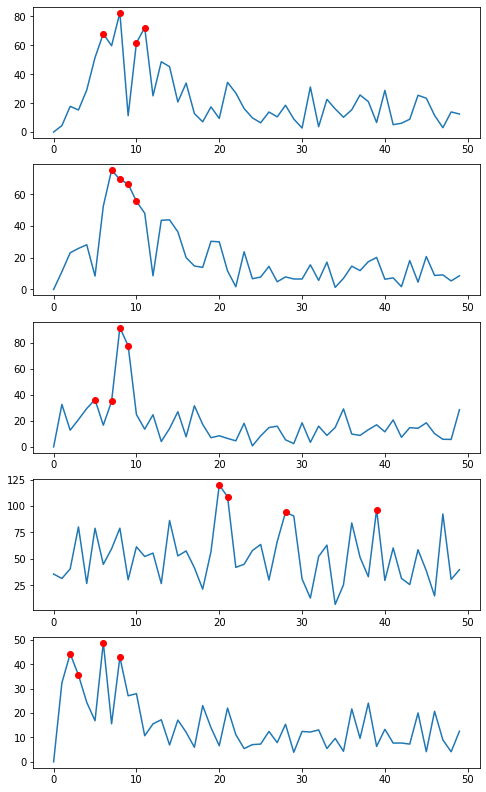

In [3]:
signals = np.genfromtxt('./dados/sinais2.csv', delimiter=',').astype(np.float32)
plt.figure(figsize=(8,14))
for i in range(signals.shape[0]):
    Fi = np.abs(np.fft.fft(signals[i]))
    k = 4
    Fi_50 = Fi[:50]
    ind = np.argpartition(Fi_50, -k)[-k:]
    print(i, ' frequências: ', np.sort(ind))
    plt.subplot(5,1,i+1); plt.plot(Fi_50);
    plt.plot(ind, Fi_50[ind], 'ro')

### Exercício 4)
 
Considerando os mesmos sinais carregados no exercício anterior, compute as características: entropia da energia (com 10 blocos), taxa de cruzamentos por zero, entropia espectral (com 10 blocos), formando um vetor com 3 características para cada sinal.

Após isso, compute a matriz de distâncias entre os sinais considerando a distância L1, i.e., a soma dos valores absolutos das diferenças entre dois vetores $A$ e $B$:

$$\sum_i |A_i - B_i|$$

Da matriz, que indica a dissimilaridade entre pares de sinais, aplique uma soma na direção do eixo 0 (axis=0) e depois arredonde para inteiro `np.round(,0)`. Quais valores foram obtidos para cada sinal?

(a) Sinais 0, 1, 2 e 4, soma 2; Sinal 3, soma 6.<br>
(b) Sinais 0 e 4, soma 3; Sinais 1 e 2, soma 2; Sinal 3, soma 6.<br>
<font color='red'>(c) Sinais 0, 1, e 2, soma 2; Sinal 3, soma 6; Sinal 4, soma 3.<br></font>
(d) Sinais 0, 1, e 2, soma 1; Sinal 3, soma 3; Sinal 4, soma 6.<br>

<font color='red'>Resposta</font>: *ver código abaixo.*

In [4]:
def entropia_energia(sinal, n_blocos=10):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

def taxa_cruzamentos_por_zero(sinal):
    '''Cruzamentos por zero em um intervalo de tempo '''
    M = len(sinal)
    cont_zero = np.sum(np.abs(np.diff(np.sign(sinal)))) / 2
    return np.float64(cont_zero) / np.float64(M - 1.0)

def entropia_espectral(sinal, n_blocos=10):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

In [5]:
features = []
for i in range(signals.shape[0]):
    f1 = entropia_energia(signals[i])
    f2 = taxa_cruzamentos_por_zero(signals[i])
    f3 = entropia_espectral(signals[i])
    features.append([f1, f2, f3])

features= np.array(features)
dmat = np.zeros([signals.shape[0],signals.shape[0]])
for i in range(signals.shape[0]):
    for j in range(signals.shape[0]):
        dmat[i,j] = np.sum(np.abs(features[i]-features[j]))
        #dmat[i,j] = np.sqrt(np.sum((features[i]-features[j])**2))

print(dmat)
print(np.round(np.sum(dmat,axis=0),0))

[[0.         0.08820419 0.16471197 1.55867705 0.56184067]
 [0.08820419 0.         0.11717896 1.55371289 0.47363648]
 [0.16471197 0.11717896 0.         1.60484023 0.42113137]
 [1.55867705 1.55371289 1.60484023 0.         1.63633509]
 [0.56184067 0.47363648 0.42113137 1.63633509 0.        ]]
[2. 2. 2. 6. 3.]


### Exercício 5)

Carregue as seguintes imagens da base de dados flickr_map_training:

`
img1 = imageio.imread("dados/flickr_map_training/107.jpg")
img2 = imageio.imread("dados/flickr_map_training/101.jpg")
img3 = imageio.imread("dados/flickr_map_training/112.jpg")
img4 = imageio.imread("dados/flickr_map_training/303.jpg")
img5 = imageio.imread("dados/flickr_map_training/400.jpg")`

Implemente um descritor de cor que computa um histograma utilizando a composição dos canais RGB em um único canal utilizando a seguinte operação, sendo R, G e B as matrizes relativas a cada canal de cor:

$$I = R\cdot0.3 +G\cdot0.59 +B\cdot0.11$$

Permita definir o número de bins do histograma por meio da sua função e, antes de retornar, normalize o histograma dividindo pela soma.

Depois, calcule a distância entre img1 carregada e as outras imagens (2, 3, 4, 5) utilizando: 16 bins e 4 bins. Qual foram as duas imagens mais similares, da mais próxima para a mais distante, nos dois casos?

<font color='red'>(a) 16 bins: img2, img4 ; 4 bins: img2, img3<br></font>
(a) 16 bins: img2, img3 ; 4 bins: img4, img3<br>
(b) 16 bins: img2, img3 ; 4 bins: img2, img4<br>
(d) 16 bins: img4, img2 ; 4 bins: img4, img3<br>

<font color='red'>Resposta</font>: *ver código abaixo.*



In [6]:
import imageio

def histograma_global_intensity(img, n_colors):
    img_int = img[:,:,0].astype(float)*0.3 + img[:,:,1].astype(float)*0.59 + img[:,:,2].astype(float)*0.11
    hist,_ = np.histogram(img_int, bins=n_colors)
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    return hist

(-0.5, 499.5, 343.5, -0.5)

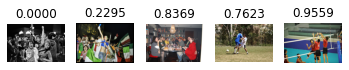

In [27]:
img1 = imageio.imread("dados/flickr_map_training/107.jpg")
img2 = imageio.imread("dados/flickr_map_training/101.jpg")
img3 = imageio.imread("dados/flickr_map_training/112.jpg")
img4 = imageio.imread("dados/flickr_map_training/303.jpg")
img5 = imageio.imread("dados/flickr_map_training/400.jpg")

ncolors = 16
f1 = histograma_global_intensity(img1, ncolors)
f2 = histograma_global_intensity(img2, ncolors)
f3 = histograma_global_intensity(img3, ncolors)
f4 = histograma_global_intensity(img4, ncolors)
f5 = histograma_global_intensity(img5, ncolors)
features = np.vstack([f1, f2, f3, f4, f5])

dist = np.zeros(5)
for i in range(5):
    dist[i] = np.sum((np.abs(features[0]-features[i])))

plt.subplot(151); plt.imshow(img1); plt.title("%.4f"%  dist[0]); plt.axis('off')
plt.subplot(152); plt.imshow(img2); plt.title("%.4f"% dist[1]); plt.axis('off')
plt.subplot(153); plt.imshow(img3); plt.title("%.4f"% dist[2]); plt.axis('off')
plt.subplot(154); plt.imshow(img4); plt.title("%.4f"% dist[3]); plt.axis('off')
plt.subplot(155); plt.imshow(img5); plt.title("%.4f"% dist[4]); plt.axis('off')

(-0.5, 499.5, 343.5, -0.5)

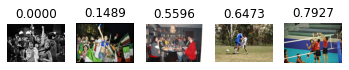

In [8]:
ncolors = 4
f1 = histograma_global_intensity(img1, ncolors)
f2 = histograma_global_intensity(img2, ncolors)
f3 = histograma_global_intensity(img3, ncolors)
f4 = histograma_global_intensity(img4, ncolors)
f5 = histograma_global_intensity(img5, ncolors)
features = np.vstack([f1, f2, f3, f4, f5])

dist = np.zeros(5)
for i in range(5):
    dist[i] = np.sum((np.abs(features[0]-features[i])))

plt.subplot(151); plt.imshow(img1); plt.title("%.4f"%  dist[0]); plt.axis('off')
plt.subplot(152); plt.imshow(img2); plt.title("%.4f"% dist[1]); plt.axis('off')
plt.subplot(153); plt.imshow(img3); plt.title("%.4f"% dist[2]); plt.axis('off')
plt.subplot(154); plt.imshow(img4); plt.title("%.4f"% dist[3]); plt.axis('off')
plt.subplot(155); plt.imshow(img5); plt.title("%.4f"% dist[4]); plt.axis('off')

### Exercício 6)

Vamos repetir o procedimento da questão anterior, agora utilizando o descritor de texturas LBP visto em aula. Utilizaremos uma função que também realiza uma normalização dos valores máximos das imagens, bem como permite definir o raio, número de pontos e quantidade de bins para esse descritor, conforme abaixo.

Calcule a distância L1 entre img1 carregada e as outras imagens utilizando o descritor LBP com os seguintes parâmetros:
* número de pontos = 14
* raio = 2
* bins = 16

Quais foram as três imagens mais similares, da mais próxima para a mais distante?

<font color='red'>(a) img3, img2, img5 <br></font>
(b) img2, img3, img4<br>
(c) img3, img5, img2<br>
(d) img5, img3, img2<br>

<font color='red'>Resposta</font>: *ver código abaixo.*


In [9]:
from skimage import feature

def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

[0 2 1 4 3]


(-0.5, 499.5, 343.5, -0.5)

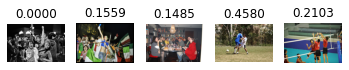

In [29]:
pts = 14
rad = 2
nbi = 16
f1 = lbp_features(img1, pts, rad, nbi)
f2 = lbp_features(img2, pts, rad, nbi)
f3 = lbp_features(img3, pts, rad, nbi)
f4 = lbp_features(img4, pts, rad, nbi)
f5 = lbp_features(img5, pts, rad, nbi)
features = np.vstack([f1, f2, f3, f4, f5])

dist = np.zeros(5)
for i in range(5):
    dist[i] = np.sum(np.abs(features[0]-features[i]))

k_cbir = np.argsort(dist)[:5]
print(k_cbir)

plt.subplot(151); plt.imshow(img1); plt.title("%.4f"%  dist[0]); plt.axis('off')
plt.subplot(152); plt.imshow(img2); plt.title("%.4f"% dist[1]); plt.axis('off')
plt.subplot(153); plt.imshow(img3); plt.title("%.4f"% dist[2]); plt.axis('off')
plt.subplot(154); plt.imshow(img4); plt.title("%.4f"% dist[3]); plt.axis('off')
plt.subplot(155); plt.imshow(img5); plt.title("%.4f"% dist[4]); plt.axis('off')

### Exercício 7)
 
No método Bag-of-Features quais das seguintes escolhas para o *framework* influenciam mais drasticamente a performance do método no caso de uso em imagens?

(a) O tamanho do dicionário, a quantidade de cores nas imagens, a quantidade de classes do problema<br>
<font color='red'>(b) O tamanho do dicionário, o descritor base, o método utilizado para aprender o dicionário<br></font>
(c) O descritor base e o número de componentes principais utilizados<br>
(d) O tamanho do patch extraído da imagem, que deve ser compatível com a resolução das imagens<br>

<font color='red'>Resposta</font>: *Ainda que todos os itens acima possam influenciar de alguma maneira, os parâmetros que podemos definir no framework Bag-of-Features são: o descritor base, o tamanho do dicionário, o método utilizado para aprender o dicionário, o tamanho do patch e o número de patches extraídos, sendo mais relevantes para a performance do método: o tamanho do dicionário, o método utilizado para aprendê-lo e o descritor base.*

### Exercício 8)

Execute o método Bag-of-Features estudado em aula, agora com os seguintes parâmetros:
* tamanho do patch = (13, 13)
* número de patches = 1000
* principais componentes = 10
* tamanho do dicionário = 50

Utilize a imagem de consulta `flower.jpg` e recupere as 12 imagens mais similares utilizando o modelo BoF aprendido. Quantas imagens foram recuperadas pertencendo à mesma categoria da consulta?

(a) 3<br>
(b) 0<br>
<font color='red'>(c) 6<br></font>
(d) 9<br>

<font color='red'>Resposta</font>: *ver codigo abaixo*

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import Parallel, delayed


def get_patches(img_file, random_state, tam_patch=(11, 11), n_patches=250):
    '''Extração de subimagens a partir de uma imagem
       Parametros
           img_file: caminho para a imagem
           random_state: semente aleatoria
           tam_patches: tamanho de cada subimagem
           n_patches: numero maximo de subimagens a extrair
    '''

    img = imread(img_file)
    
    # Extrai subimagens
    patch = extract_patches_2d(img, 
                               patch_size=tam_patch,
                               max_patches=n_patches, 
                               random_state=random_state)
    
    return patch.reshape((n_patches, 
                          np.prod(tam_patch) * len(img.shape)))

In [12]:
# Parametros do BOF
tam_patch = (13, 13) # param
n_patches = 1000 # param
path_imgs = './dados/flickr_map_training/'
random_state = 1
# pega lista de arquivos no caminho
l_imgs = listdir(path_imgs)

# total de imagens
n_imgs = len(l_imgs)

# Extrai patches de cada imagem, de forma paralela para cada imagem
# retorna uma lista do mesmo tamanho do número de imagens
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extraídos para criação do dicionário de features')
print('Total de imagens = ', len(patch_arr))
print('Tamanho de cada array de patches = ', patch_arr[0].shape)


Patches extraídos para criação do dicionário de features
Total de imagens =  80
Tamanho de cada array de patches =  (1000, 507)


In [13]:
pca_components = 10 # param

# Criando matriz com todos os patches para aplicar PCA
patch_arr2 = np.array(patch_arr, copy=True)
patch_arr2 = patch_arr2.reshape((patch_arr2.shape[0] * patch_arr2.shape[1],
                               patch_arr2.shape[2]))

print('Total de instancias = ', len(patch_arr2), ' de tamanho = ', patch_arr2[0].shape[0])

# Construindo modelo de componentes principais
modelo_PCA = PCA(n_components=pca_components, random_state=random_state)
modelo_PCA.fit(patch_arr2)
patch_pca = modelo_PCA.transform(patch_arr2)

print('Espaço de características PCA criado')

print('\tpatches = ', len(patch_pca), ' de tamanho = ', patch_pca[0].shape[0])

Total de instancias =  80000  de tamanho =  507
Espaço de características PCA criado
	patches =  80000  de tamanho =  10


In [14]:
n_dic = 50 # parametro
random_state = 1

# Construindo o dicionário
kmeans_model = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
kmeans_model.fit(patch_pca)

print('Dicionário aprendido')

Dicionário aprendido


In [15]:
img_feats = []

# para cada imagem
for i in range(n_imgs):
    # predicao para os n_patches de uma imagem
    y = kmeans_model.predict(patch_pca[i*n_patches: (i*n_patches)+n_patches])

    # computa histograma e armazena no array de features
    hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    img_feats.append(hist_bof)

img_feats = np.array(img_feats, copy=False)
print('Número de imagens e features = ', img_feats.shape)

Número de imagens e features =  (80, 50)


Patches extraídos
(1000, 507)
PCA executado
(1000, 10)
Features do BOF obtidas
Distancias calculadas
imagem mais similar = 35  distancia = 0.23383327393679457
Recall = 0.6000
Total na categoria = 6


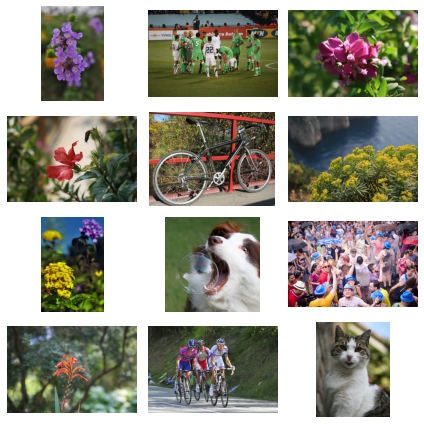

In [16]:
path_query = './dados/flickr_map_test/flower.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_pca = modelo_PCA.transform(query_patches)
print('PCA executado')
print(query_pca.shape)

# obtem palavras visuais
y = kmeans_model.predict(query_pca)
# computa histograma como feature
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

print('Features do BOF obtidas')

dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

k = 12

# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:k]

print('Distancias calculadas')
print('imagem mais similar =', k_cbir[0], ' distancia =', dists[k_cbir[0]])

import imageio
imgq = imageio.imread(path_query)

fig, axes = plt.subplots(4, 3, figsize=(6, 6))
ax = axes.ravel()
imgs = []
cats = np.zeros(k)
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    ax[i].imshow(imgs[i])
    ax[i].axis('off')
    cats[i] = int(l_imgs[k_cbir[i]][0])
fig.tight_layout()

tot_cat = 10
imgs_cat = np.sum(cats==6) 
recall = imgs_cat/tot_cat
print("Recall = %.4f" % (recall))
print("Total na categoria = %d" % (imgs_cat))

Patches extraídos
(1000, 507)
PCA executado
(1000, 10)
Features do BOF obtidas
Distancias calculadas
imagem mais similar = 12  distancia = 0.14860013458944107
Recall = 0.0909
Total na categoria = 1


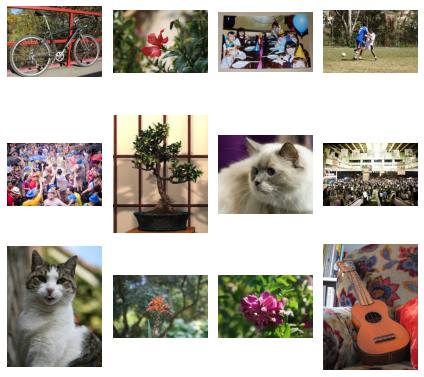

In [17]:
path_query = './dados/flickr_map_test/football.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_pca = modelo_PCA.transform(query_patches)
print('PCA executado')
print(query_pca.shape)

# obtem palavras visuais
y = kmeans_model.predict(query_pca)
# computa histograma como feature
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

print('Features do BOF obtidas')

dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

k = 12
# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:k]

print('Distancias calculadas')
print('imagem mais similar =', k_cbir[0], ' distancia =', dists[k_cbir[0]])

import imageio
imgq = imageio.imread(path_query)

fig, axes = plt.subplots(3, 4, figsize=(6, 6))
ax = axes.ravel()
imgs = []
cats = np.zeros(k)
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    ax[i].imshow(imgs[i])
    ax[i].axis('off')
    cats[i] = int(l_imgs[k_cbir[i]][0])
fig.tight_layout()

tot_cat = 11
imgs_cat = np.sum(cats==3) # categoria futebol = 3 
recall = imgs_cat/tot_cat
print("Recall = %.4f" % (recall))
print("Total na categoria = %d" % (imgs_cat))

### Exercício 9)
 
Execute o método Bag-of-Features estudado em aula, agora com os seguintes parâmetros:
* tamanho do patch = (13, 13)
* número de patches = 1000
* tamanho do dicionário = 50
* descritor base = LBP com raio 3, 24 pontos e 16 bins

Vamos usar a versão da função LBP que permite usar como parâmetros o número de pontos e raio.

Utilize imagem de consulta `football.jpg` e recupere as 12 imagens mais similares utilizando o modelo BoF aprendido. Qual a proporção de imagens da mesma categoria da consulta?

(a) 0<br>
(b) 9<br>
<font color='red'>(c) 4<br></font>
(d) 2<br>


In [18]:
def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

In [19]:
# Parametros do BOF
tam_patch = (13, 13) # parametro
n_patches = 1000 # parametro
path_imgs = './dados/flickr_map_training/'
random_state = 1
# pega lista de arquivos no caminho
l_imgs = listdir(path_imgs)

# total de imagens
n_imgs = len(l_imgs)

# Extrai patches de cada imagem, de forma paralela para cada imagem
# retorna uma lista do mesmo tamanho do número de imagens
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extraídos para criação do dicionário de features')
print('Total de imagens = ', len(patch_arr))
print('Tamanho de cada array de patches = ', patch_arr[0].shape)

# Criando matriz com todos os patches para aplicar PCA
patch_arr2 = np.array(patch_arr, copy=True)
patch_arr2 = patch_arr2.reshape((patch_arr2.shape[0] * patch_arr2.shape[1],
                               tam_patch[0],tam_patch[0],3))

print('Tamanho de cada array de patches = ', patch_arr2.shape)


Patches extraídos para criação do dicionário de features
Total de imagens =  80
Tamanho de cada array de patches =  (1000, 507)
Tamanho de cada array de patches =  (80000, 13, 13, 3)


In [20]:
# obtendo features lbp para cada patch
patch_lbp = []
for pat in patch_arr2:
        f = lbp_features(pat,3,24,16)
        patch_lbp.append(f)

patch_lbp = np.array(patch_lbp, copy=False)

print('Total de instancias = ', len(patch_lbp), ' de tamanho = ', patch_lbp[0].shape[0])

print('Espaço de características LBP criado')

print('\tpatches = ', len(patch_lbp), ' de tamanho = ', patch_lbp[0].shape[0])

n_dic = 50 # parametro
random_state = 1

# Construindo o dicionário
kmeans_model = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
kmeans_model.fit(patch_lbp)

print('Dicionário aprendido')

img_feats = []

# para cada imagem
for i in range(n_imgs):
    # predicao para os n_patches de uma imagem
    y = kmeans_model.predict(patch_lbp[i*n_patches: (i*n_patches)+n_patches])

    # computa histograma e armazena no array de features
    hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    img_feats.append(hist_bof)

img_feats = np.array(img_feats, copy=False)
print('Número de imagens e features = ', img_feats.shape)

Total de instancias =  80000  de tamanho =  16
Espaço de características LBP criado
	patches =  80000  de tamanho =  16
Dicionário aprendido
Número de imagens e features =  (80, 50)


(1000, 507)
Patches extraídos
(1000, 13, 13, 3)
LBP executado
(1000, 16)
Features do BOF obtidas
Distancias calculadas
imagem mais similar = 62  distancia = 0.0
Recall = 0.3636
Total na categoria = 4


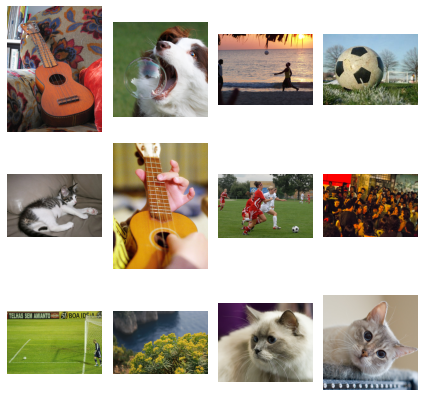

In [21]:
path_query = './dados/flickr_map_test/football.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print(query_patches.shape)

query_patches = query_patches.reshape((query_patches.shape[0],
                               tam_patch[0],tam_patch[0],3))

print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_lbp = []
for pat in query_patches:
        f = lbp_features(pat,3,24,16)
        query_lbp.append(f)

query_lbp = np.array(query_lbp, copy=False)
print('LBP executado')
print(query_lbp.shape)

# obtem palavras visuais
y = kmeans_model.predict(query_lbp)
# computa histograma como feature
query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)

print('Features do BOF obtidas')

dists = []
for i in range(n_imgs):
    diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
    dists.append(diq)

k = 12
# pega imagens mais proximas    
k_cbir = np.argsort(dists)[:k]

print('Distancias calculadas')
print('imagem mais similar =', k_cbir[0], ' distancia =', dists[k_cbir[0]])

import imageio
imgq = imageio.imread(path_query)

fig, axes = plt.subplots(3, 4, figsize=(6, 6))
ax = axes.ravel()
imgs = []
cats = np.zeros(k)
for i in range(k):
    imgs.append(imageio.imread(path_imgs+l_imgs[k_cbir[i]]))
    ax[i].imshow(imgs[i])
    ax[i].axis('off')
    cats[i] = int(l_imgs[k_cbir[i]][0])
fig.tight_layout()

tot_cat = 11
imgs_cat = np.sum(cats==3) # categoria futebol = 3 
recall = imgs_cat/tot_cat
print("Recall = %.4f" % (recall))
print("Total na categoria = %d" % (imgs_cat))

### Exercício 10)
 
Execute o método Bag-of-Features para aprender features nas imagens da pasta `flickr_map_training` conforme código fornecido em aula, com os seguintes parâmetros:
* tamanho do patch = (11, 11)
* número de patches = 350
* descritor base = PCA com 16 componentes
* random_state = 1
* para o KMeans use random_state=1 e n_init=3

Vamos investigar a influência do tamanho do dicionário no modelo gerado com os seguintes valores: 10, 50, 100, 250 e 500. Utilize a imagem de teste `flickr_map_test\flower.jpg` para recuperar as 16 imagens mais similares no conjunto de treinamento (sabendo que há 10 imagens dessa categoria no conjunto de treinamento). Calcule a revocação, ou seja, a razão entre o total de imagens de flores retornadas na busca das 16 mais similares e o número total de imagens de flores que deveriam ter sido retornadas (10).

DICA: as imagens de flores tem nome iniciando com o número '6'.

Qual(is) tamanho(s) de dicionário resultam em maior valor de revocação?

(a) 50 e 100 <br>
<font color='red'>(b) 50<br></font>
(c) 100<br>
(d) 250 e 500<br>
(e) 10 e 50<br>

<font color='red'>Resposta</font>: *Ver código abaixo. Nem sempre um maior dicionário resulta em melhor performance. Em geral um dicionário muito pequeno não representa bem a base de dados, e um dicionário muito grande gera uma espécie de sobreajuste (overfitting) dos dados.*


In [22]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import Parallel, delayed


def get_patches(img_file, random_state, tam_patch=(11, 11), n_patches=250):
    '''Extração de subimagens a partir de uma imagem
       Parametros
           img_file: caminho para a imagem
           random_state: semente aleatoria
           tam_patches: tamanho de cada subimagem
           n_patches: numero maximo de subimagens a extrair
    '''

    img = imread(img_file)
    
    # Extrai subimagens
    patch = extract_patches_2d(img, 
                               patch_size=tam_patch,
                               max_patches=n_patches, 
                               random_state=random_state)
    
    return patch.reshape((n_patches, 
                          np.prod(tam_patch) * len(img.shape)))

In [23]:
# Parametros do BOF
tam_patch = (11, 11)
n_patches = 350
pca_components = 16
path_imgs = './dados/flickr_map_training/'
random_state = 1
# pega lista de arquivos no caminho
l_imgs = listdir(path_imgs)

# total de imagens
n_imgs = len(l_imgs)

# Extrai patches de cada imagem, de forma paralela para cada imagem
# retorna uma lista do mesmo tamanho do número de imagens
patch_arr = Parallel(n_jobs=-1)(delayed(get_patches)(path_imgs+arq_img, 
                                                    random_state,
                                                    tam_patch,
                                                    n_patches)
                                for arq_img in l_imgs)

print('Patches extraídos para criação do dicionário de features')
print('Total de imagens = ', len(patch_arr))
print('Tamanho de cada array de patches = ', patch_arr[0].shape)


Patches extraídos para criação do dicionário de features
Total de imagens =  80
Tamanho de cada array de patches =  (350, 363)


In [24]:
# Criando matriz com todos os patches para aplicar PCA
patch_arr2 = np.array(patch_arr, copy=True)
patch_arr2 = patch_arr2.reshape((patch_arr2.shape[0] * patch_arr2.shape[1],
                               patch_arr2.shape[2]))

# Construindo modelo de componentes principais
modelo_PCA = PCA(n_components=pca_components, random_state=random_state)
modelo_PCA.fit(patch_arr2)
patch_pca = modelo_PCA.transform(patch_arr2)

print('Espaço de características PCA criado')
print('\tpatches = ', len(patch_pca), ' de tamanho = ', patch_pca[0].shape[0])

Espaço de características PCA criado
	patches =  28000  de tamanho =  16


In [25]:
search_dicts = [10, 50, 100, 250, 500]
random_state = 1

kmeans_d = []
# Construindo os dicionários
for n_dic in search_dicts:
    km = KMeans(n_clusters=n_dic, 
                      verbose=False, 
                      init='random',
                      random_state=random_state, 
                      n_init=3)
    km.fit(patch_pca)
    kmeans_d.append(km)
    print('K =', n_dic, end='; ')

print('> Dicionários aprendidos')

K = 10; K = 50; K = 100; K = 250; K = 500; > Dicionários aprendidos


In [26]:
path_query = './dados/flickr_map_test/flower.jpg'
# pegando patches
query_patches = get_patches(path_query, random_state, tam_patch, n_patches)
query_patches = np.array(query_patches, copy=False)
print('Patches extraídos')
print(query_patches.shape)

# redimensionando e aplicando pca
query_pca = modelo_PCA.transform(query_patches)
print('PCA executado')
print(query_pca.shape)

d = 0
for n_dic in search_dicts:
    img_feats = []

    # para cada imagem
    for i in range(n_imgs):
        # predicao para os n_patches de uma imagem
        y = kmeans_d[d].predict(patch_pca[i*n_patches: (i*n_patches)+n_patches])

        # computa histograma e armazena no array de features
        hist_bof,_ = np.histogram(y, bins=range(n_dic+1), density=True)
        img_feats.append(hist_bof)

    # features dicionário atual
    img_feats = np.array(img_feats, copy=False)

    # obtem palavras visuais
    y = kmeans_d[d].predict(query_pca)
    d = d + 1
    
    # computa histograma como feature
    query_feats,_ = np.histogram(y, bins=range(n_dic+1), density=True)
    dists = []
    for i in range(n_imgs):
        diq = np.sqrt(np.sum((img_feats[i]-query_feats)**2))
        dists.append(diq)
    
    # pega imagens mais proximas    
    k = 16
    k_cbir = np.argsort(dists)[:k]
    cats = np.zeros(k)
    for i in range(k):
        cats[i] = int(l_imgs[k_cbir[i]][0])
    tot_cat = 10
    recall = np.sum(cats==6)/tot_cat
    print("N_dic = %d, Recall = %.4f" % (n_dic, recall))

Patches extraídos
(350, 363)
PCA executado
(350, 16)
N_dic = 10, Recall = 0.2000
N_dic = 50, Recall = 0.7000
N_dic = 100, Recall = 0.6000
N_dic = 250, Recall = 0.5000
N_dic = 500, Recall = 0.5000
